# Ансамблевые методы: Bagging и Boosting



## Содержание лекции

1. Введение в ансамблевые методы
2. Bagging (Bootstrap Aggregating)
3. Random Forest
4. Boosting методы
5. AdaBoost
6. Gradient Boosting
7. XGBoost
8. Сравнение методов
9. Практические примеры

## 1. Введение в ансамблевые методы

### Определение
Ансамблевые методы объединяют несколько базовых алгоритмов (слабых обучающихся) для создания более точной и стабильной модели.

### Принцип работы
**"Мудрость толпы"** - комбинирование предсказаний нескольких моделей часто дает лучший результат, чем любая отдельная модель.

### Основные подходы
- **Bagging**: Параллельное обучение моделей на разных подвыборках
- **Boosting**: Последовательное обучение моделей с фокусом на ошибках предыдущих
- **Stacking**: Использование мета-модели для комбинирования предсказаний

### Преимущества ансамблей
1. Снижение переобучения
2. Повышение точности
3. Увеличение стабильности
4. Робастность к выбросам

In [3]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, load_wine, load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    BaggingClassifier, RandomForestClassifier, 
    AdaBoostClassifier, GradientBoostingClassifier
)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

# Настройка графиков
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (10, 6)
sns.set_palette("husl")

print("Библиотеки успешно импортированы")

Библиотеки успешно импортированы


## 2. Bagging (Bootstrap Aggregating)

### Принцип работы
1. **Bootstrap sampling**: Создание подвыборок с возвращением
2. **Parallel training**: Независимое обучение моделей на каждой подвыборке
3. **Aggregation**: Усреднение предсказаний (регрессия) или голосование (классификация)

### Математическая формулировка
Для классификации: $\hat{y} = \text{mode}\{h_1(x), h_2(x), ..., h_M(x)\}$

Для регрессии: $\hat{y} = \frac{1}{M}\sum_{i=1}^{M} h_i(x)$

где $h_i$ - i-я базовая модель, $M$ - количество моделей

### Преимущества Bagging
- Снижение дисперсии модели
- Параллелизация обучения
- Устойчивость к переобучению
- Работает с любыми базовыми алгоритмами

In [6]:
# Демонстрация Bagging
# Загрузка данных
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, 
                          n_redundant=10, n_clusters_per_class=1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Сравнение одиночного дерева решений с Bagging
# Одиночное дерево
single_tree = DecisionTreeClassifier(random_state=42)
single_tree.fit(X_train, y_train)
single_pred = single_tree.predict(X_test)
single_accuracy = accuracy_score(y_test, single_pred)

# Bagging с деревьями решений
bagging = BaggingClassifier(
    n_estimators=100,
    random_state=42
)
bagging.fit(X_train, y_train)
bagging_pred = bagging.predict(X_test)
bagging_accuracy = accuracy_score(y_test, bagging_pred)

print("Сравнение производительности:")
print(f"Одиночное дерево решений: {single_accuracy:.4f}")
print(f"Bagging (100 деревьев): {bagging_accuracy:.4f}")
print(f"Улучшение: {bagging_accuracy - single_accuracy:.4f}")

Сравнение производительности:
Одиночное дерево решений: 0.9267
Bagging (100 деревьев): 0.9600
Улучшение: 0.0333


## 3. Random Forest

### Определение
Random Forest - это специальный случай Bagging, который использует деревья решений в качестве базовых моделей и добавляет случайность при выборе признаков.

### Ключевые особенности
1. **Bootstrap sampling** для создания подвыборок
2. **Random feature selection** в каждом узле дерева
3. **Множество деревьев** без обрезки
4. **Голосование** для финального предсказания

### Параметры Random Forest
- `n_estimators`: количество деревьев
- `max_features`: количество признаков для рассмотрения в каждом узле
- `max_depth`: максимальная глубина деревьев
- `min_samples_split`: минимальное количество образцов для разбиения

### Важность признаков
Random Forest автоматически вычисляет важность признаков на основе снижения неоднородности во всех деревьях.

Точность Random Forest: 1.0000

Отчет классификации:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       1.00      1.00      1.00        21
     class_2       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



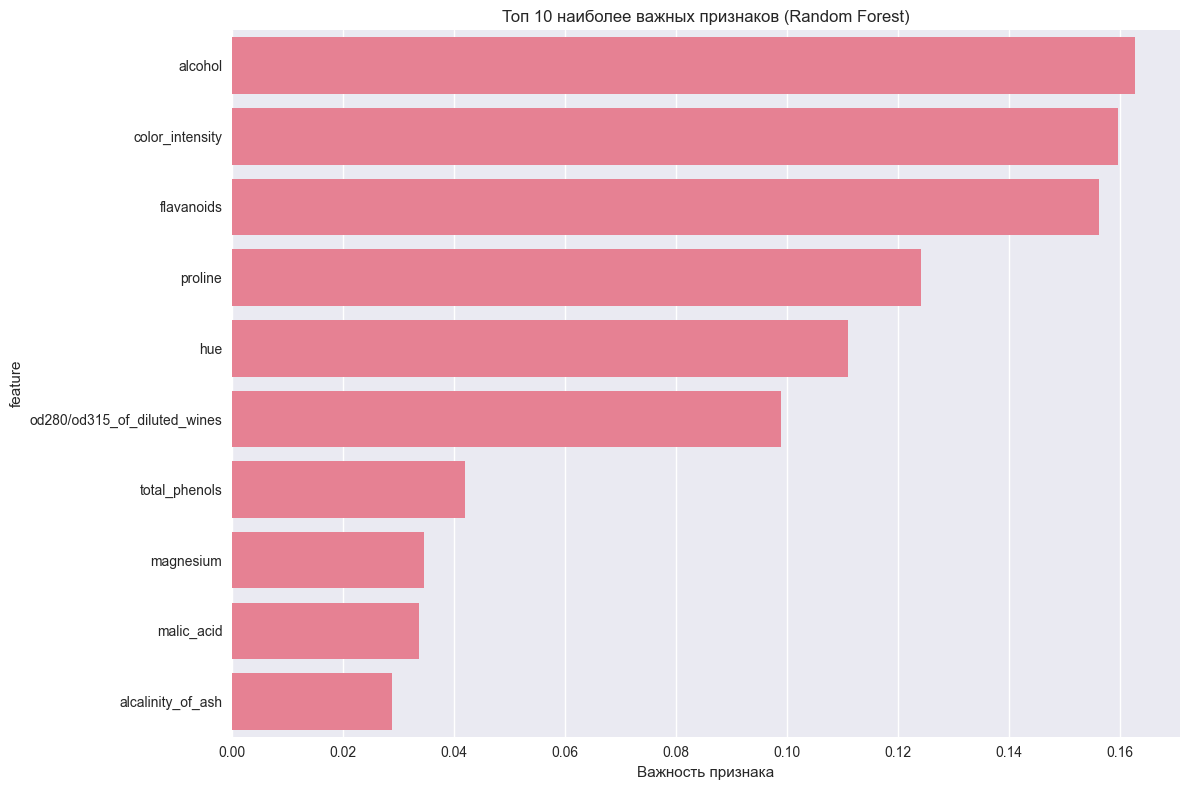


Топ 5 наиболее важных признаков:
alcohol: 0.1627
color_intensity: 0.1597
flavanoids: 0.1563
proline: 0.1241
hue: 0.1110


In [7]:
# Демонстрация Random Forest
# Загрузка реального датасета
wine_data = load_wine()
X_wine, y_wine = wine_data.data, wine_data.target
feature_names = wine_data.feature_names

X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(
    X_wine, y_wine, test_size=0.3, random_state=42, stratify=y_wine
)

# Обучение Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_wine, y_train_wine)

# Предсказания и оценка
rf_pred = rf.predict(X_test_wine)
rf_accuracy = accuracy_score(y_test_wine, rf_pred)

print(f"Точность Random Forest: {rf_accuracy:.4f}")
print("\nОтчет классификации:")
print(classification_report(y_test_wine, rf_pred, target_names=wine_data.target_names))

# Важность признаков
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

# Визуализация важности признаков
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Топ 10 наиболее важных признаков (Random Forest)')
plt.xlabel('Важность признака')
plt.tight_layout()
plt.show()

print("\nТоп 5 наиболее важных признаков:")
for i, row in feature_importance.head().iterrows():
    print(f"{row['feature']}: {row['importance']:.4f}")

## 4. Boosting методы

### Принцип работы
Boosting обучает модели последовательно, где каждая новая модель пытается исправить ошибки предыдущих.

### Ключевые идеи
1. **Последовательное обучение**: модели обучаются одна за другой
2. **Фокус на ошибках**: новые модели концентрируются на неправильно классифицированных примерах
3. **Взвешенное голосование**: более точные модели имеют больший вес

### Типы Boosting
- **AdaBoost** (Adaptive Boosting)
- **Gradient Boosting**
- **XGBoost** (Extreme Gradient Boosting)
- **LightGBM**
- **CatBoost**

### Преимущества Boosting
- Высокая точность
- Превращение слабых обучающихся в сильных
- Автоматический отбор признаков

### Недостатки
- Склонность к переобучению
- Чувствительность к шуму и выбросам
- Невозможность параллелизации

## 5. AdaBoost (Adaptive Boosting)

### Алгоритм AdaBoost
1. Инициализировать равные веса для всех образцов
2. Для каждой итерации t:
   - Обучить слабый классификатор на взвешенных данных
   - Вычислить ошибку классификатора
   - Вычислить вес классификатора
   - Обновить веса образцов (увеличить для неправильно классифицированных)
3. Объединить все классификаторы с их весами

### Математическая формулировка
Вес классификатора: $\alpha_t = \frac{1}{2} \ln\left(\frac{1-\epsilon_t}{\epsilon_t}\right)$

где $\epsilon_t$ - ошибка классификатора t

Финальное предсказание: $H(x) = \text{sign}\left(\sum_{t=1}^{T} \alpha_t h_t(x)\right)$

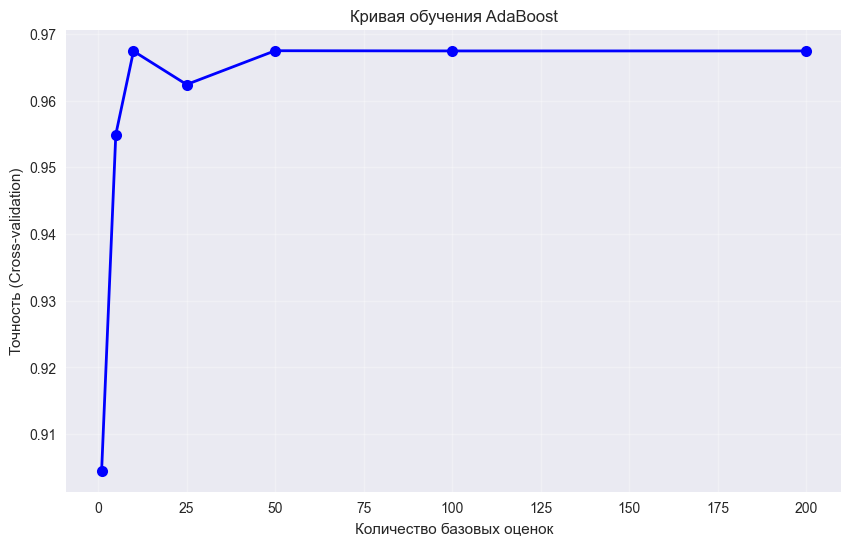

Точность AdaBoost: 0.9532


In [12]:
# Демонстрация AdaBoost
# Загрузка данных о раке молочной железы
cancer_data = load_breast_cancer()
X_cancer, y_cancer = cancer_data.data, cancer_data.target

# Стандартизация данных
scaler = StandardScaler()
X_cancer_scaled = scaler.fit_transform(X_cancer)

X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(
    X_cancer_scaled, y_cancer, test_size=0.3, random_state=42, stratify=y_cancer
)

# Сравнение различных количеств оценок
n_estimators_range = [1, 5, 10, 25, 50, 100, 200]
ada_scores = []

for n_est in n_estimators_range:
    ada = AdaBoostClassifier(
        n_estimators=n_est,
        random_state=42
    )
    scores = cross_val_score(ada, X_train_cancer, y_train_cancer, cv=5)
    ada_scores.append(scores.mean())

# Визуализация кривой обучения
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, ada_scores, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Количество базовых оценок')
plt.ylabel('Точность (Cross-validation)')
plt.title('Кривая обучения AdaBoost')
plt.grid(True, alpha=0.3)
plt.show()

# Обучение финальной модели
ada_final = AdaBoostClassifier(
    n_estimators=100,
    random_state=42,
)
ada_final.fit(X_train_cancer, y_train_cancer)
ada_pred = ada_final.predict(X_test_cancer)
ada_accuracy = accuracy_score(y_test_cancer, ada_pred)

print(f"Точность AdaBoost: {ada_accuracy:.4f}")

## 6. Gradient Boosting

### Принцип работы
Gradient Boosting строит модели последовательно, где каждая новая модель предсказывает остатки (градиенты) предыдущих моделей.

### Алгоритм
1. Инициализировать модель константой
2. Для каждой итерации:
   - Вычислить остатки (градиенты функции потерь)
   - Обучить новую модель предсказывать остатки
   - Добавить новую модель к ансамблю с определенным весом
3. Финальное предсказание = сумма всех моделей

### Ключевые параметры
- `n_estimators`: количество бустинг-стадий
- `learning_rate`: скорость обучения (шаг градиента)
- `max_depth`: максимальная глубина отдельных регрессоров
- `subsample`: доля образцов для обучения каждого дерева

### Компромисс между learning_rate и n_estimators
Меньший learning_rate требует больше деревьев, но обычно дает лучшую производительность.

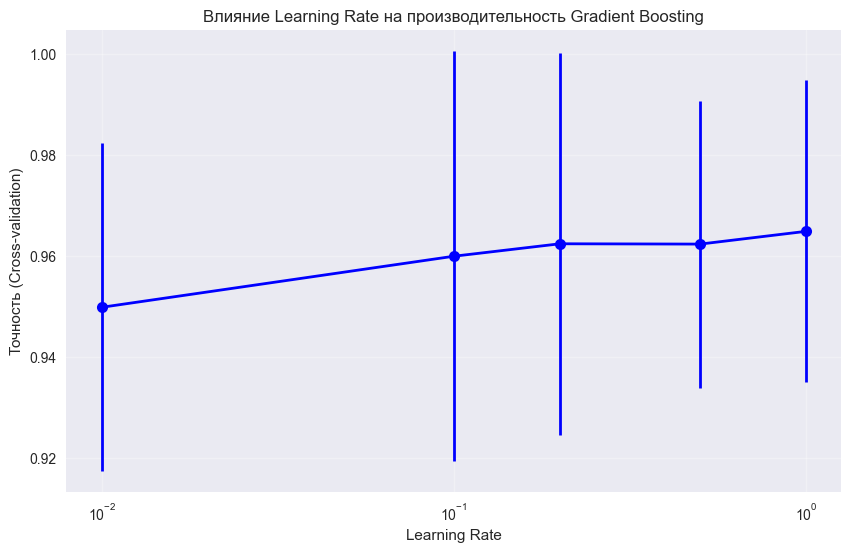

Результаты для различных Learning Rate:
LR = 0.01: 0.9499 ± 0.0325
LR = 0.1: 0.9600 ± 0.0406
LR = 0.2: 0.9625 ± 0.0379
LR = 0.5: 0.9624 ± 0.0284
LR = 1.0: 0.9649 ± 0.0300

Точность оптимального Gradient Boosting: 0.9474

Точность оптимального Gradient Boosting: 0.9474


In [13]:
# Демонстрация Gradient Boosting
# Исследование влияния learning_rate
learning_rates = [0.01, 0.1, 0.2, 0.5, 1.0]
gb_results = []

for lr in learning_rates:
    gb = GradientBoostingClassifier(
        n_estimators=100,
        learning_rate=lr,
        max_depth=3,
        random_state=42
    )
    scores = cross_val_score(gb, X_train_cancer, y_train_cancer, cv=5)
    gb_results.append({
        'learning_rate': lr,
        'mean_score': scores.mean(),
        'std_score': scores.std()
    })

# Визуализация влияния learning_rate
gb_df = pd.DataFrame(gb_results)
plt.figure(figsize=(10, 6))
plt.errorbar(gb_df['learning_rate'], gb_df['mean_score'], 
             yerr=gb_df['std_score'], fmt='bo-', linewidth=2, markersize=8)
plt.xlabel('Learning Rate')
plt.ylabel('Точность (Cross-validation)')
plt.title('Влияние Learning Rate на производительность Gradient Boosting')
plt.grid(True, alpha=0.3)
plt.xscale('log')
plt.show()

print("Результаты для различных Learning Rate:")
for result in gb_results:
    print(f"LR = {result['learning_rate']}: {result['mean_score']:.4f} ± {result['std_score']:.4f}")

# Обучение оптимальной модели
gb_optimal = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gb_optimal.fit(X_train_cancer, y_train_cancer)
gb_pred = gb_optimal.predict(X_test_cancer)
gb_accuracy = accuracy_score(y_test_cancer, gb_pred)

print(f"\nТочность оптимального Gradient Boosting: {gb_accuracy:.4f}")

## 7. XGBoost (Extreme Gradient Boosting)

### Особенности XGBoost
XGBoost - это оптимизированная реализация градиентного бустинга с множеством улучшений:

1. **Регуляризация**: L1 и L2 регуляризация для предотвращения переобучения
2. **Эффективность**: Оптимизированные алгоритмы и структуры данных
3. **Параллелизация**: Параллельное построение деревьев
4. **Обработка пропусков**: Автоматическая обработка отсутствующих значений
5. **Pruning**: Обрезка деревьев снизу вверх

### Ключевые параметры
- `n_estimators`: количество деревьев
- `learning_rate`: шаг градиента
- `max_depth`: максимальная глубина
- `reg_alpha`: L1 регуляризация
- `reg_lambda`: L2 регуляризация
- `subsample`: доля образцов
- `colsample_bytree`: доля признаков

Точность XGBoost: 0.9532


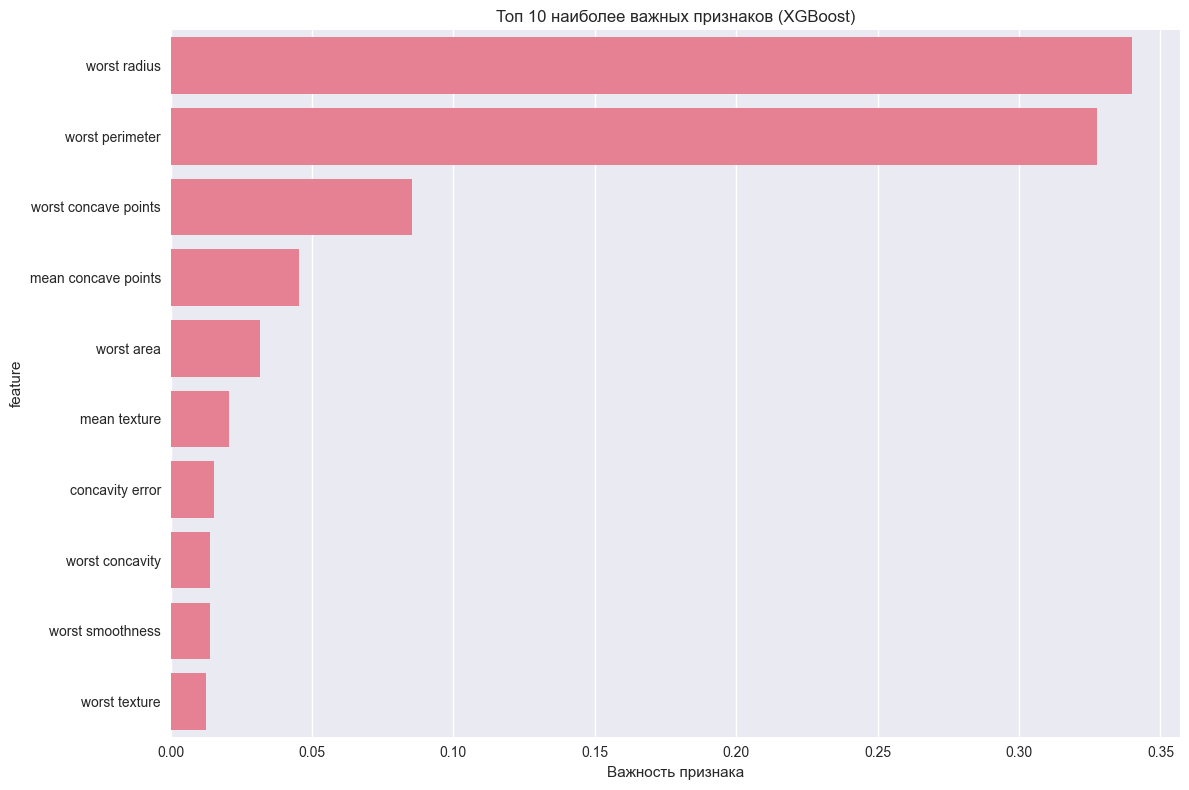


Топ 5 наиболее важных признаков (XGBoost):
worst radius: 0.3399
worst perimeter: 0.3276
worst concave points: 0.0854
mean concave points: 0.0455
worst area: 0.0318


In [14]:
# Демонстрация XGBoost
# Обучение XGBoost модели
xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42,
    eval_metric='logloss'  # Подавление предупреждений
)

xgb.fit(X_train_cancer, y_train_cancer)
xgb_pred = xgb.predict(X_test_cancer)
xgb_accuracy = accuracy_score(y_test_cancer, xgb_pred)

print(f"Точность XGBoost: {xgb_accuracy:.4f}")

# Важность признаков в XGBoost
feature_names_cancer = cancer_data.feature_names
xgb_importance = pd.DataFrame({
    'feature': feature_names_cancer,
    'importance': xgb.feature_importances_
}).sort_values('importance', ascending=False)

# Визуализация важности признаков
plt.figure(figsize=(12, 8))
sns.barplot(data=xgb_importance.head(10), x='importance', y='feature')
plt.title('Топ 10 наиболее важных признаков (XGBoost)')
plt.xlabel('Важность признака')
plt.tight_layout()
plt.show()

print("\nТоп 5 наиболее важных признаков (XGBoost):")
for i, row in xgb_importance.head().iterrows():
    print(f"{row['feature']}: {row['importance']:.4f}")

## 8. Сравнение ансамблевых методов

### Сравнительная таблица

| Метод | Тип | Параллелизация | Устойчивость к переобучению | Скорость обучения |
|-------|-----|----------------|----------------------------|------------------|
| Bagging | Параллельный | Да | Высокая | Быстрая |
| Random Forest | Параллельный | Да | Высокая | Быстрая |
| AdaBoost | Последовательный | Нет | Средняя | Средняя |
| Gradient Boosting | Последовательный | Нет | Низкая | Медленная |
| XGBoost | Последовательный | Частично | Средняя | Быстрая |

Сравнение производительности моделей:
            Model  CV Mean  CV Std  Test Accuracy
         AdaBoost   0.9674  0.0244         0.9532
          XGBoost   0.9599  0.0299         0.9532
          Bagging   0.9599  0.0299         0.9474
Gradient Boosting   0.9600  0.0406         0.9474
    Random Forest   0.9725  0.0330         0.9357
      Single Tree   0.9247  0.0369         0.9181


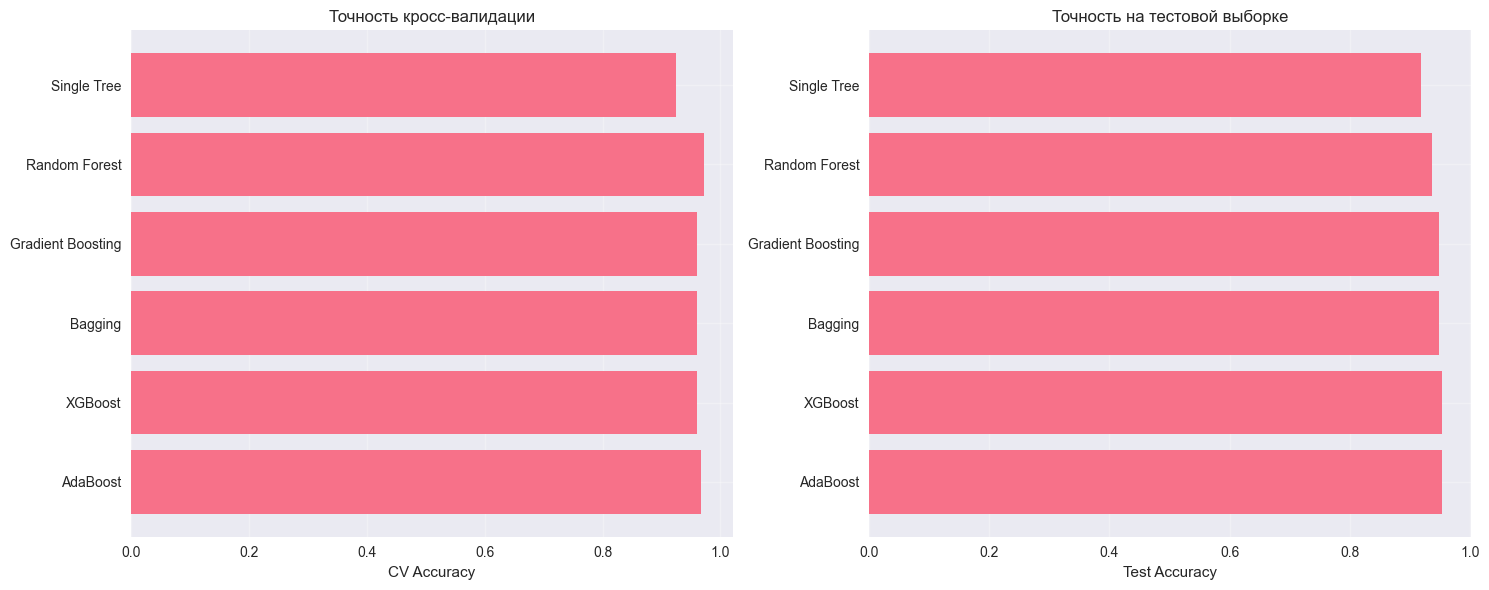

In [16]:
# Комплексное сравнение всех методов
models = {
    'Single Tree': DecisionTreeClassifier(random_state=42),
    'Bagging': BaggingClassifier(estimator=DecisionTreeClassifier(), 
                                n_estimators=100, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                                  n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,
                                                   max_depth=3, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3,
                           random_state=42, eval_metric='logloss')
}

# Оценка всех моделей
results = []
for name, model in models.items():
    # Кросс-валидация
    cv_scores = cross_val_score(model, X_train_cancer, y_train_cancer, cv=5)
    
    # Обучение на полной обучающей выборке
    model.fit(X_train_cancer, y_train_cancer)
    test_pred = model.predict(X_test_cancer)
    test_accuracy = accuracy_score(y_test_cancer, test_pred)
    
    results.append({
        'Model': name,
        'CV Mean': cv_scores.mean(),
        'CV Std': cv_scores.std(),
        'Test Accuracy': test_accuracy
    })

# Создание таблицы результатов
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Test Accuracy', ascending=False)

print("Сравнение производительности моделей:")
print(results_df.to_string(index=False, float_format='%.4f'))

# Визуализация результатов
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# График кросс-валидации
ax1.barh(results_df['Model'], results_df['CV Mean'])
ax1.set_xlabel('CV Accuracy')
ax1.set_title('Точность кросс-валидации')
ax1.grid(True, alpha=0.3)

# График тестовой точности
ax2.barh(results_df['Model'], results_df['Test Accuracy'])
ax2.set_xlabel('Test Accuracy')
ax2.set_title('Точность на тестовой выборке')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 9. Практические рекомендации

### Когда использовать какой метод

**Random Forest:**
- Хороший выбор по умолчанию
- Большие датасеты
- Нужна интерпретируемость
- Ограниченное время на настройку

**Gradient Boosting/XGBoost:**
- Максимальная точность
- Соревнования по машинному обучению
- Есть время на настройку гиперпараметров
- Средние по размеру датасеты

**AdaBoost:**
- Простые задачи бинарной классификации
- Данные без сильного шума
- Нужна простота реализации

### Советы по настройке

1. **Начните с Random Forest** - хорошая базовая модель
2. **Используйте кросс-валидацию** для выбора гиперпараметров
3. **Мониторьте переобучение** особенно для boosting методов
4. **Настраивайте learning_rate и n_estimators** совместно
5. **Используйте early stopping** для предотвращения переобучения

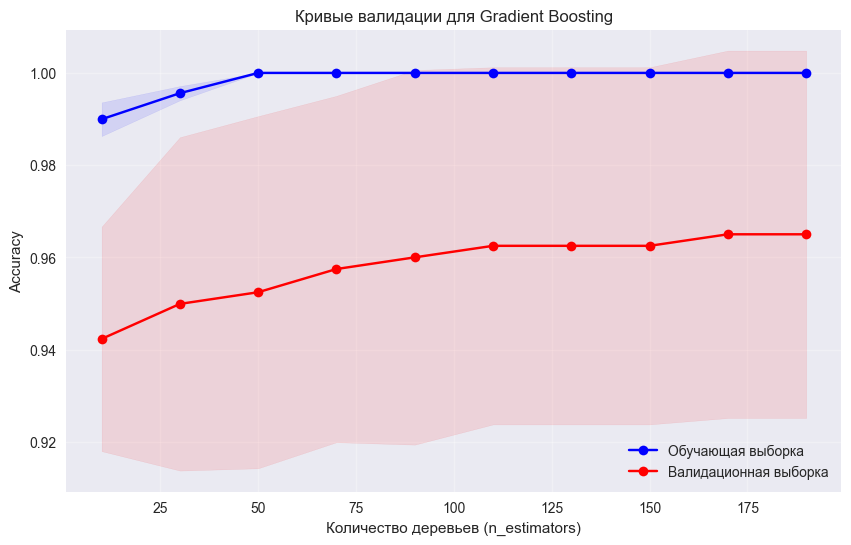

Оптимальное количество деревьев: 170
Максимальная точность валидации: 0.9650


In [17]:
# Демонстрация early stopping в Gradient Boosting
from sklearn.model_selection import validation_curve

# Исследование количества деревьев
n_estimators_range = np.arange(10, 201, 20)
train_scores, test_scores = validation_curve(
    GradientBoostingClassifier(learning_rate=0.1, max_depth=3, random_state=42),
    X_train_cancer, y_train_cancer,
    param_name='n_estimators',
    param_range=n_estimators_range,
    cv=5, scoring='accuracy'
)

# Вычисление средних и стандартных отклонений
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_mean = test_scores.mean(axis=1)
test_std = test_scores.std(axis=1)

# Визуализация кривых валидации
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_mean, 'o-', color='blue', label='Обучающая выборка')
plt.fill_between(n_estimators_range, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')

plt.plot(n_estimators_range, test_mean, 'o-', color='red', label='Валидационная выборка')
plt.fill_between(n_estimators_range, test_mean - test_std, test_mean + test_std, alpha=0.1, color='red')

plt.xlabel('Количество деревьев (n_estimators)')
plt.ylabel('Accuracy')
plt.title('Кривые валидации для Gradient Boosting')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Найти оптимальное количество деревьев
optimal_n_estimators = n_estimators_range[np.argmax(test_mean)]
print(f"Оптимальное количество деревьев: {optimal_n_estimators}")
print(f"Максимальная точность валидации: {test_mean.max():.4f}")

## Заключение

### Ключевые выводы

1. **Ансамблевые методы** значительно превосходят одиночные модели по точности и стабильности

2. **Bagging (Random Forest)** лучше подходит для:
   - Снижения переобучения
   - Параллельного обучения
   - Работы с шумными данными

3. **Boosting методы** лучше для:
   - Максимизации точности
   - Работы с слабыми обучающимися
   - Сложных задач классификации

4. **Важность настройки гиперпараметров** критична для boosting методов

5. **XGBoost** часто является лучшим выбором для соревнований и практических задач

### Следующие шаги
- Изучение других ансамблевых методов (LightGBM, CatBoost)
- Методы стекинга (Stacking)
- Оптимизация гиперпараметров
- Работа с несбалансированными датасетами

## Домашнее задание

1. Загрузите любой датасет классификации из sklearn.datasets
2. Сравните производительность всех изученных ансамблевых методов
3. Настройте гиперпараметры для лучшей модели с помощью GridSearchCV
4. Проанализируйте важность признаков
5. Создайте отчет с визуализациями и выводами

**Критерии оценки:**
- Корректность реализации (40%)
- Качество анализа (30%)
- Визуализации (20%)
- Выводы и интерпретация (10%)